In [13]:
import mdtraj as md
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from funcs_validate_msm import *
from funcs_sample import *
from funcs_featurise import * 
from funcs_characterise import *
from paths import *
from natsort import natsorted

/home/rzhu/Loc/miniconda3/envs/kinase/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
crystal_files = Path("./human_egfr/").rglob("kinoml*.pdb")
crystal_files = natsorted([str(f) for f in crystal_files])

In [11]:
frames = [] 
for crystal in crystal_files:
    sample_frame = md.load(crystal)
    sample_frame = sample_frame.atom_slice(sample_frame.top.select('mass>1.1'))
    frames.append(sample_frame)
crystals = md.join(frames)

In [14]:
dbdist_f = dbdist_featuriser(crystals)
ploop_f = ploop_featuriser(crystals)
achelix_f = achelix_featuriser(crystals)
rspine_f = rspine_featuriser(crystals)

---

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

def hierarchical_clustering(ftraj, stride=1, method='average', maxclust=3):
    Z = linkage(ftraj[::stride], method=method)
    R = dendrogram(Z)
    cluster_labels = fcluster(Z, maxclust, criterion='maxclust')

    points = []
    for i in range(maxclust):
        points.append(ftraj[::stride][cluster_labels == i+1])
    return cluster_labels, points

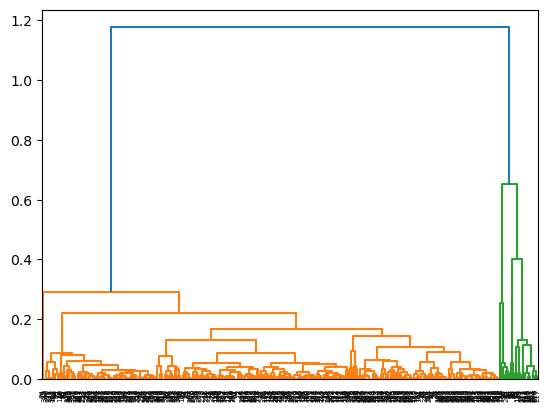

In [20]:
cluster_labels, points = hierarchical_clustering(dbdist_f, stride=1, method='average', maxclust=4)

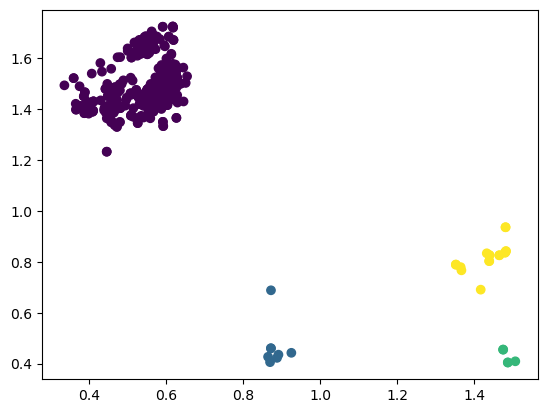

In [26]:
plt.scatter(dbdist_f[:,0], dbdist_f[:,1], c=cluster_labels)

In [58]:
for s in np.arange(len(points))+1:
    indices = np.where(cluster_labels == s)[0]
    samples = np.random.choice(a=indices, size=5)
    crystals[samples].save_pdb(f"data_egfr/crystal_samples/ploop_samples_{s}.pdb")